In [98]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [99]:
import os
import warnings
warnings.filterwarnings('ignore')

In [100]:
df = pd.read_csv("Dataset/USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


# PreProcessing

# 1 . Handling null values

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [102]:
df.isnull().sum() /len(df) *100

Avg. Area Income                0.20
Avg. Area House Age             0.00
Avg. Area Number of Rooms       0.10
Avg. Area Number of Bedrooms    0.12
Area Population                 0.00
Price                           0.00
Address                         0.00
dtype: float64

In [103]:
# Not more then 20% so omit removing of missing values and use imputation method

In [104]:
list(df.select_dtypes(exclude = 'object').columns)[0:]

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price']

# Univarient method :

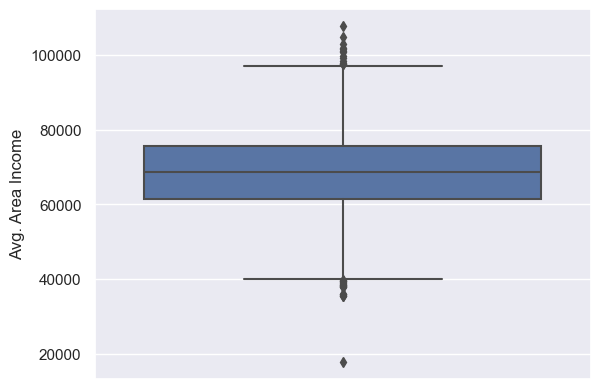

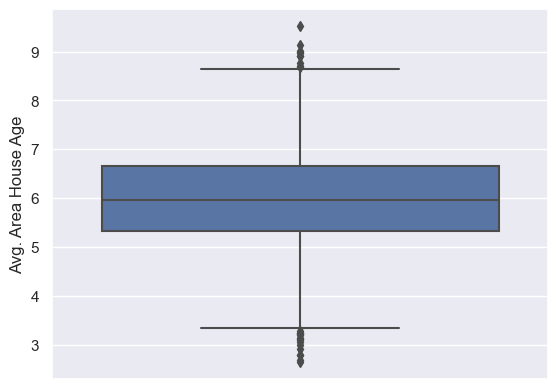

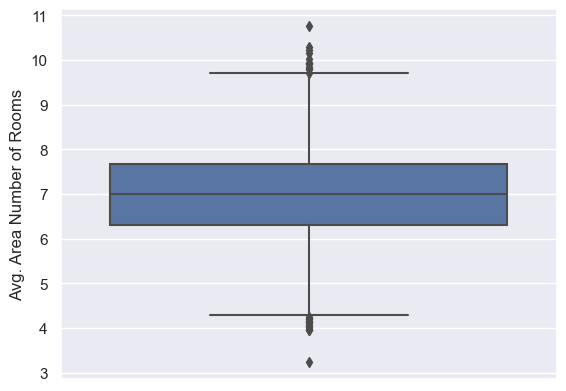

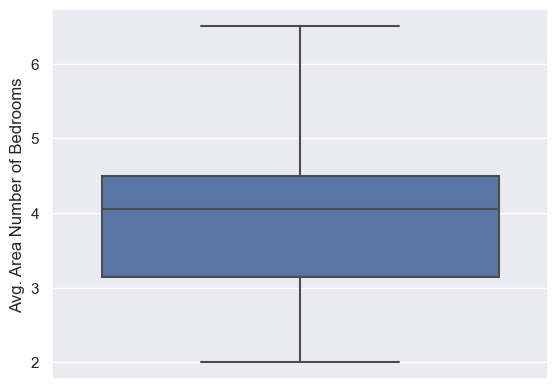

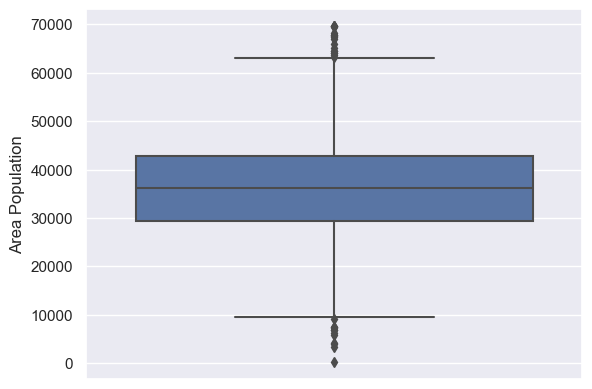

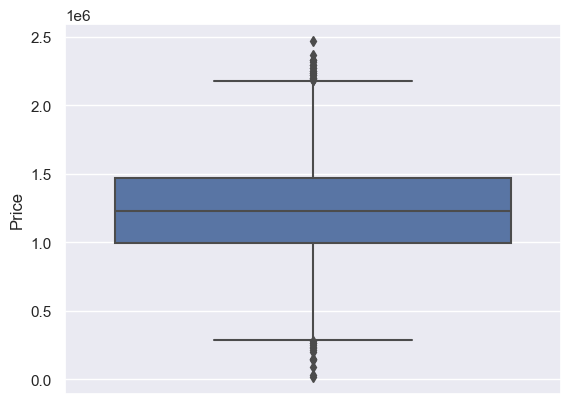

In [105]:
def boxplots(col):
    sns.boxplot(y = df[col])
    plt.show()

for i in list(df.select_dtypes(exclude = 'object').columns):
    boxplots(i)

In [9]:
df['Avg. Area Income'] = df['Avg. Area Income'].fillna(df['Avg. Area Income'].median())
df['Avg. Area Number of Rooms'] = df['Avg. Area Number of Rooms'].fillna(df['Avg. Area Number of Rooms'].median())
df['Avg. Area Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].fillna(df['Avg. Area Number of Bedrooms'].mean())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [11]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

# 2.Encoding

In [12]:
df['Address'].value_counts()

Address
208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101             1
314 Christopher Square Apt. 404\nLake Ronaldville, SD 42025      1
21042 Wilson Islands Suite 238\nFischerchester, MP 42425-4129    1
Unit 8831 Box 5748\nDPO AE 73012-7314                            1
481 Kaitlin Mission Apt. 309\nJodystad, IA 16947                 1
                                                                ..
054 Carter Crescent Suite 674\nGlennport, WA 11140               1
8460 Kathleen Mission Apt. 482\nPort Amytown, KY 72016           1
3737 Hartman Rue\nReneestad, ID 69250-7718                       1
3465 Latoya Well\nNelsonmouth, MI 55741-4287                     1
37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595          1
Name: count, Length: 5000, dtype: int64

In [13]:
# more then 50000 col will be created when we encode it and other variables refer to the addrass
# we need to do statitially if it is siginficant or not

In [14]:
df['Address'].value_counts().sum()

5000

In [15]:
df['Address'] = df['Address'].astype('category')
df['Address'] = df['Address'].cat.codes

In [16]:
df['Address'].head()

0     962
1     863
2    4069
3    4794
4    4736
Name: Address, dtype: int16

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   int16  
dtypes: float64(6), int16(1)
memory usage: 244.3 KB


In [18]:
# whether address is significent varaible or not
# check p-value
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("Price~Address" , data = df).fit()
anova_result = sm.stats.anova_lm(model , typ = 2)
print(anova_result)

                sum_sq      df         F    PR(>F)
Address   4.729103e+10     1.0  0.379215  0.538051
Residual  6.232883e+14  4998.0       NaN       NaN


In [19]:
# Address is non significant variable as p value is 0.538051

In [20]:
df = df.drop(['Address'] ,axis = 1)

In [21]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


# 3. Outlier Treatment - mandatory whenever we do linear regression model

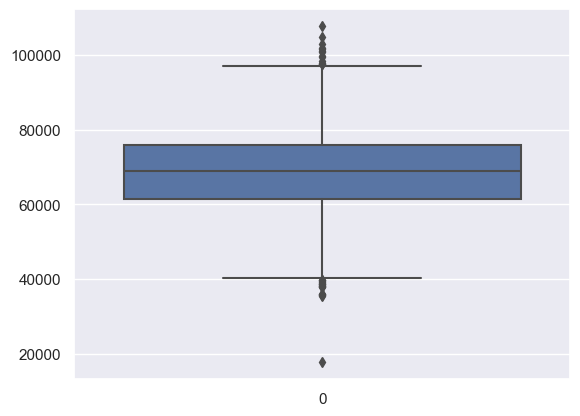

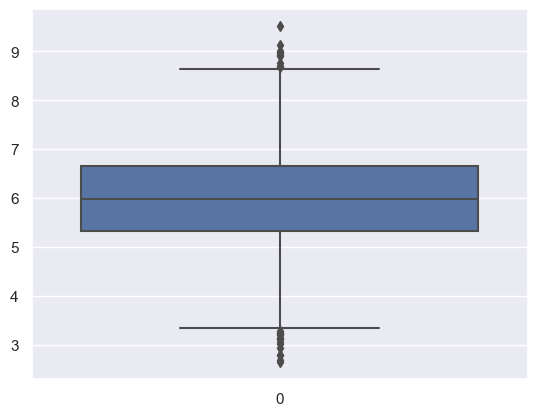

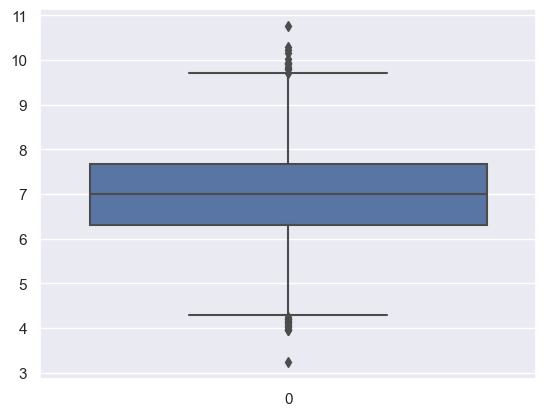

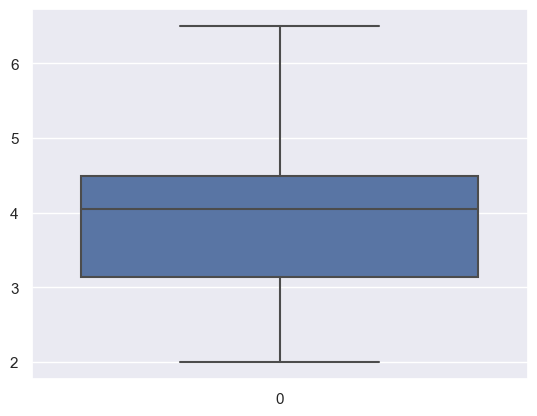

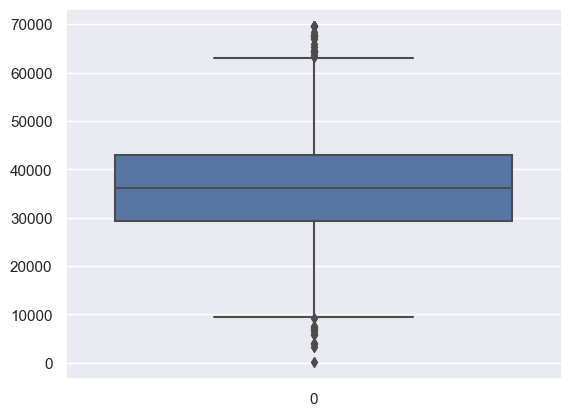

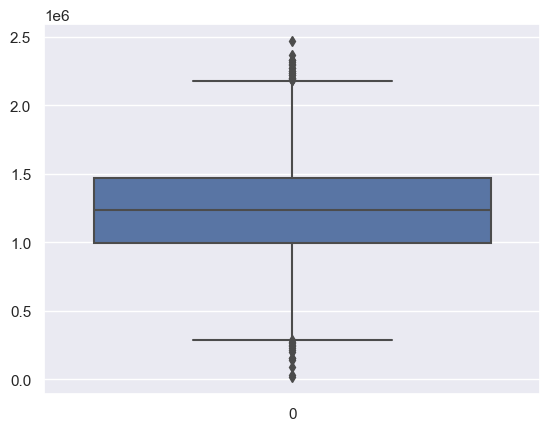

In [22]:
# check outlier

def boxplot(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.select_dtypes(exclude = 'object').columns)[0:]:
    boxplot(i)

In [23]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [24]:
# should not handle dependent variable outlier

In [25]:
# outlier found - 'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Area Population'

In [26]:
income_q1 = df['Avg. Area Income'].quantile(0.25)
income_q3 = df['Avg. Area Income'].quantile(0.75)
income_iqr = income_q3 - income_q1
income_min = income_q1 - 1.5 * income_iqr
income_max = income_q3 + 1.5 * income_iqr
print(income_min , in-come_max)

40063.096827499976 97188.57246750002


In [27]:
df['Avg. Area Income'] = np.where(df['Avg. Area Income'] < income_min, income_min , 
                                  np.where(df['Avg. Area Income'] > income_max , income_max , 
                                           df['Avg. Area Income']))

In [28]:
age_q1 = df['Avg. Area House Age'].quantile(0.25)
age_q3 = df['Avg. Area House Age'].quantile(0.75)
age_iqr = age_q3 - age_q1
age_min = age_q1 - 1.5 * age_iqr
age_max = age_q3 + 1.5 * age_iqr
df['Avg. Area House Age'] = np.where(df['Avg. Area House Age'] > age_max , age_max ,
                                    np.where(df['Avg. Area House Age'] < age_min, age_min , df['Avg. Area House Age']))

In [29]:
rooms_q1 = df['Avg. Area Number of Rooms'].quantile(0.25)
rooms_q3 = df['Avg. Area Number of Rooms'].quantile(0.75)
rooms_iqr = rooms_q3 - rooms_q1
rooms_min = rooms_q1 - 1.5 * rooms_iqr
rooms_max = rooms_q3 + 1.5 * rooms_iqr
df['Avg. Area Number of Rooms'] = np.where(df['Avg. Area Number of Rooms'] > rooms_max , rooms_max ,
                                    np.where(df['Avg. Area Number of Rooms'] < rooms_min, rooms_min , 
                                             df['Avg. Area Number of Rooms']))

In [30]:
pop_q1 = df['Area Population'].quantile(0.25)
pop_q3 = df['Area Population'].quantile(0.75)
pop_iqr = pop_q3 - pop_q1
pop_min = pop_q1 - 1.5 * pop_iqr
pop_max = pop_q3 + 1.5 * pop_iqr
df['Area Population'] = np.where(df['Area Population'] > pop_max , pop_max ,
                                    np.where(df['Area Population'] < pop_min, pop_min , 
                                             df['Area Population']))

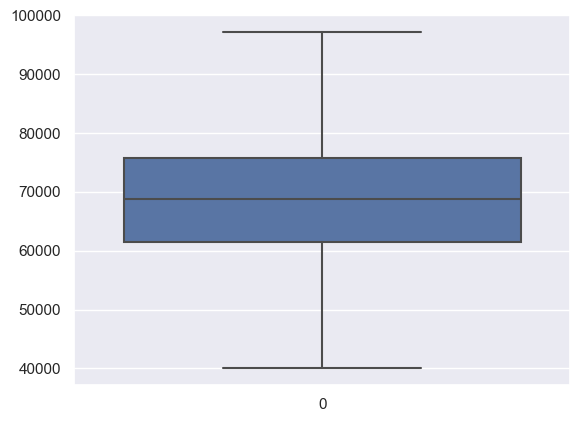

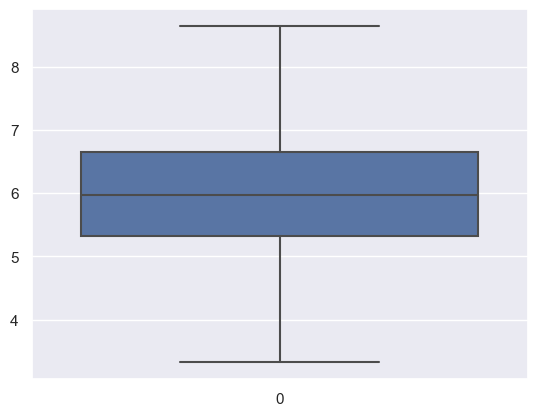

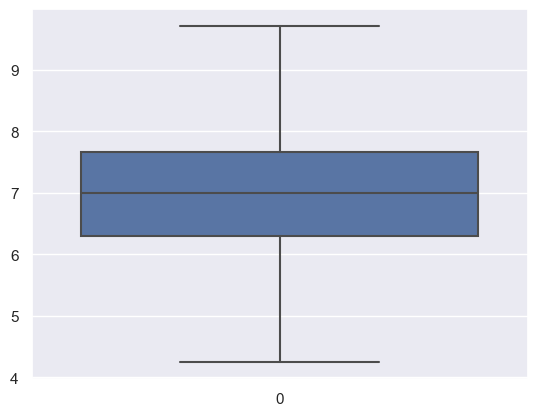

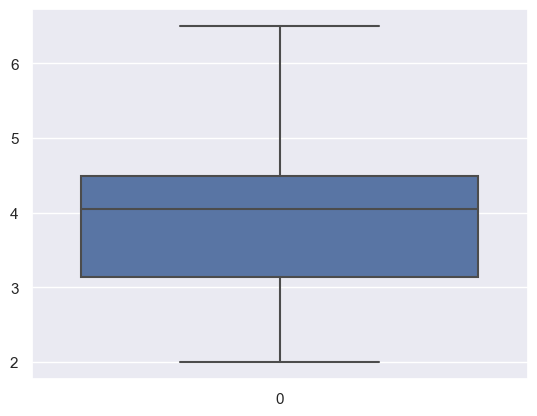

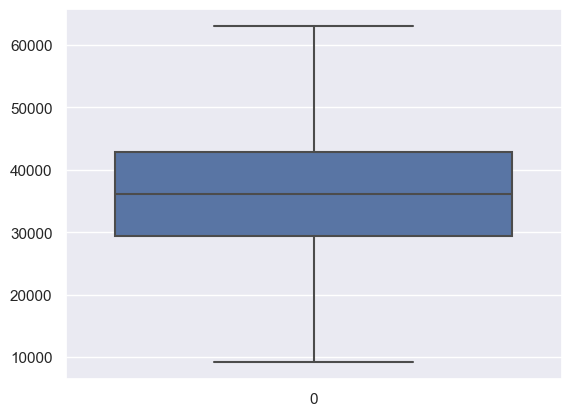

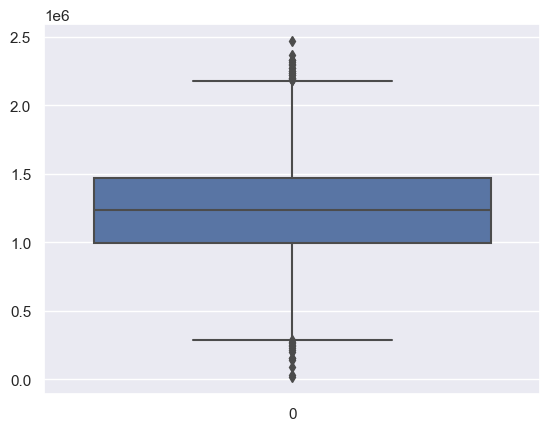

In [31]:
# check outlier

def boxplot(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.select_dtypes(exclude = 'object').columns)[0:]:
    boxplot(i)

# 4. Feature Scaling

In [32]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68587.479539,5.977490,6.987540,3.981874,36159.070769,1.232073e+06
std,10574.362055,0.986995,1.001419,1.233756,9862.221143,3.531176e+05
min,40063.096827,3.329495,4.251308,2.000000,9217.885595,1.593866e+04
25%,61485.150192,5.322283,6.299692,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06
75%,75766.519103,6.650808,7.665281,4.490000,42861.290770,1.471210e+06
max,97188.572468,8.643597,9.713664,6.500000,63047.333875,2.469066e+06


### please note when we use gradient desceent then 100% feature scaling is required, there higher value differentation takes time refer screenshot
### For ols check model is performing better with or without feature scaling and take action accordingly

In [33]:
# divide the data into independent and dependent variable

In [34]:
x = df.drop(['Price'] , axis = 1)
y = df[['Price']]

In [35]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [36]:
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [38]:
 pd.DataFrame(x_scaler).head()

,0,1,2,3,4
0,1.036382,-0.298541,0.021620,0.087648,-1.325622
1,1.008309,0.025747,-0.256381,-0.722966,0.407049
2,-0.690457,-0.113082,1.523179,0.930687,0.073326
3,-0.495800,1.226822,-1.398967,-0.585161,-0.187484
4,-0.813869,-0.949376,0.850726,0.201134,-0.994293


In [39]:
# Preprocessing part
# 1.Handling null values - completed
# 2.Handling encoding - completed
# 3.Handling outlier - completed
# 4.Handling frature scaling - completed
# 5.Handling imbalance data - not applicable for linear regression

<AxesSubplot:>

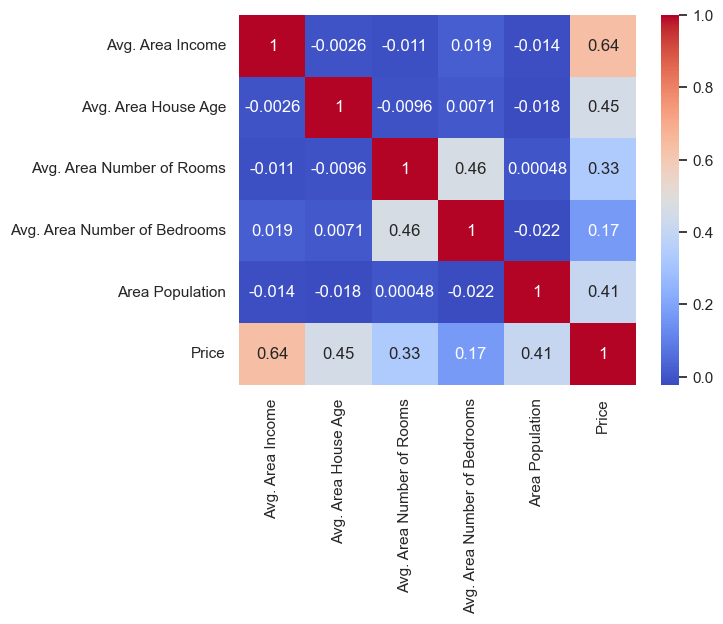

In [40]:
# Heat Map

sns.heatmap(df.corr() , annot = True , cmap = 'coolwarm')

## Variance inflation factor (VIF)

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaler
vif = pd.DataFrame()
vif['Variance inflation factor'] = [variance_inflation_factor(variable , i)
                                   for i in range(variable.shape[1])]
vif['features'] = x.columns

In [42]:
vif

,Variance inflation factor,features
0,1.001066,Avg. Area Income
1,1.000593,Avg. Area House Age
2,1.274838,Avg. Area Number of Rooms
3,1.275700,Avg. Area Number of Bedrooms
4,1.001142,Area Population


In [43]:
# check duplicate data
df.duplicated().sum()

0

# Advance EDA - pandas profiling

In [51]:
from ydata_profiling import ProfileReport
pr = ProfileReport(df)
pr.to_file(output_file = 'Eda_Housing_dataset.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

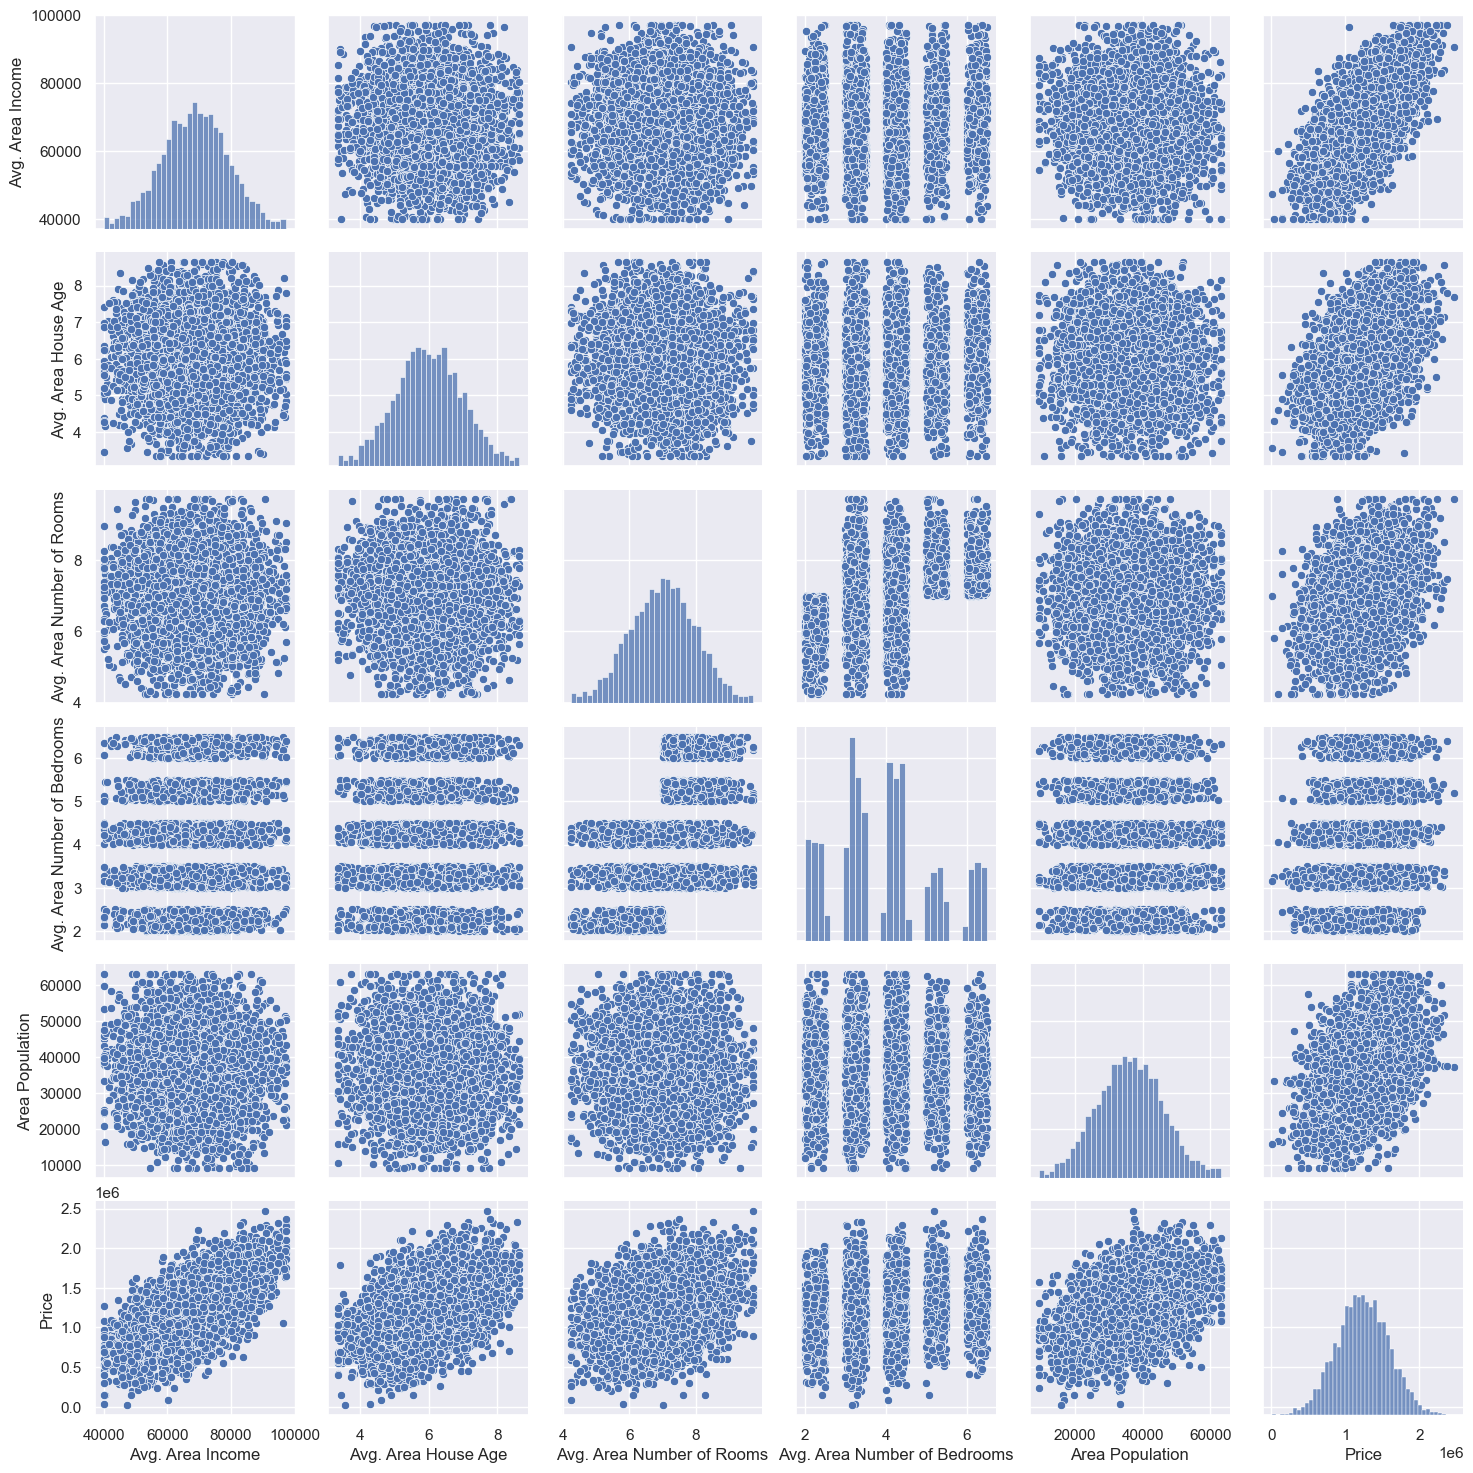

In [52]:
sns.pairplot(df)

# Split the data into train and test

In [67]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size = 0.7 , random_state = 101)

# Build OLS Model

In [68]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [69]:
regression_model = smf.OLS(endog = y_train , exog = x_train).fit()

In [70]:
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          1.865e+04
Date:                Wed, 01 May 2024   Prob (F-statistic):                        0.00
Time:                        15:48:12   Log-Likelihood:                         -48367.
No. Observations:                3500   AIC:                                  9.674e+04
Df Residuals:                    3495   BIC:                                  9.678e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.1182      0.325     31.096      0.000       9.480      10.756
Avg. Area House Age           5.007e+04   3624.334     13.816      0.000     4.3e+04    5.72e+04
Avg. Area Number of Rooms    -9462.5755   3955.728     -2.392      0.017   -1.72e+04   -1706.805
Avg. Area Number of Bedrooms  3884.9989   3773.959      1.029      0.303   -3514.387    1.13e+04
Area Population                  8.4540      0.397     21.318      0.000       7.677       9.232
==============================================================================
Omnibus:                        0.414   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.813   Jarque-Bera (JB):                0.467
Skew:                          -0.003   Prob(JB):                        0.792
Kurtosis:                       2.944   Cond. No.                     9.32e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
#regression_model1 = smf.OLS(endog = y_split , exog = x_test).fit()

In [72]:
#regression_model1.summary()

# sklearn Linear regression Model

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lr = LinearRegression()

In [75]:
lr.fit(x_train , y_train)

LinearRegression()

In [76]:
y_predict_train = lr.predict(x_train)

In [77]:
y_predict_test = lr.predict(x_test)

In [88]:
from sklearn.metrics import r2_score
print('training accuracy :' , r2_score(y_train , y_predict_train))
print('testing accuracy : ' , r2_score(y_test , y_predict_test))

training accuracy : 0.915838657450251
testing accuracy :  0.9156697910198255


0.9156697910198255

# Linearity

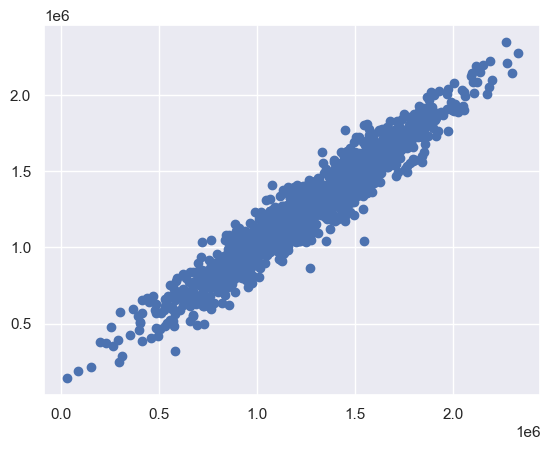

In [90]:
plt.scatter(y_test , y_predict_test)

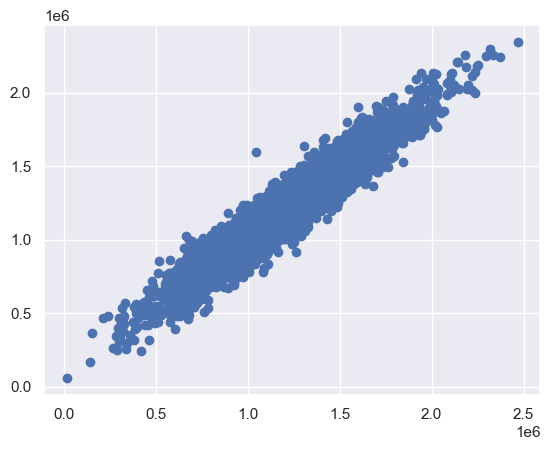

In [91]:
plt.scatter(y_train , y_predict_train)

# Normality of residual

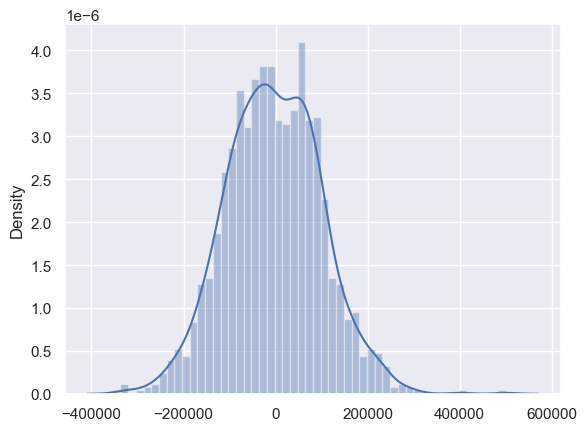

In [94]:
sns.distplot((y_test - y_predict_test) , bins = 50)
plt.show()

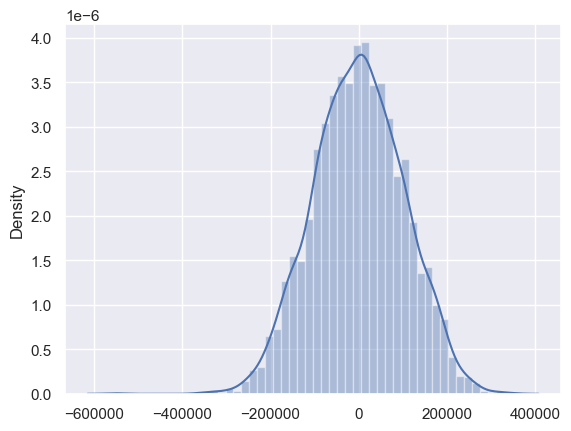

In [95]:
sns.distplot((y_train - y_predict_train) , bins = 50)
plt.show()

In [96]:
# conclude
# part -1 : r-square and adjusted-r-square - satisfied
# part -2 : p-value - satisfied (please drop bedroom and try)
# part -3 : Assumption
    # a) No Auto corelation found -satisfied
    # b) No multicolinearity - satisfied
    # c) No endoginity - satisfied (as taken right dv as price)
    # d) homoscedasticity - satisfied (outlier treatment done)
    # e) normality of residual - satisfied
    # f) Linearity with actual dv with pred dv- satisfied 

In [97]:
# pending
# mean absolute error , mean aboslute percent error , mean square error , root mean square error , lasso , ridge ,
 # elasticnet and gradinet descent and cross validation 
    # stats - t-test

In [ ]:
# Home work - ADVANCE HOUSING PRICE DATASET
# HOME WORK - AirBNB.csv (accuracy test more then 70% by using linear regression)